# Multivariate Optimization - Constrained
- **Purpose**: Minimize f(x) subject to constraints
- **scipy.optimize**: minimize with constraints, LinearConstraint, NonlinearConstraint
- **Methods**: SLSQP, trust-constr, COBYLA

Key concepts:
- **Equality constraints**: h(x) = 0
- **Inequality constraints**: g(x) ≤ 0
- **Bounds**: a ≤ x ≤ b
- **Feasible region**: Set of points satisfying all constraints
- **KKT conditions**: Necessary conditions for optimality

Real applications:
- **Portfolio optimization**: Budget constraints, risk limits
- **Resource allocation**: Limited resources, quotas
- **Engineering design**: Physical constraints, safety limits
- **Production planning**: Capacity constraints, demand requirements
- **Diet optimization**: Nutritional requirements, cost limits

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon

np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print("Constrained optimization module loaded")

Constrained optimization module loaded


## Basic Example: Bounds Only

**Problem**: Minimize f(x,y) = (x-2)² + (y-1)² subject to 0 ≤ x,y ≤ 3

**Unconstrained minimum**: (2, 1)

**With bounds**: Still (2, 1) (interior solution)

**Bounds in scipy**:
```python
from scipy.optimize import Bounds
bounds = Bounds([x_min, y_min], [x_max, y_max])
result = optimize.minimize(f, x0, bounds=bounds, method='L-BFGS-B')
```

Minimize (x-2)² + (y-1)² with 0 ≤ x,y ≤ 3

Optimization result:
  Optimal point: x = [2. 1.]
  Minimum value: f = 0.000000
  Success: True

Unconstrained minimum: (2, 1)
Constrained minimum: (2.0000, 1.0000)

Since (2,1) is inside bounds, solution is same!


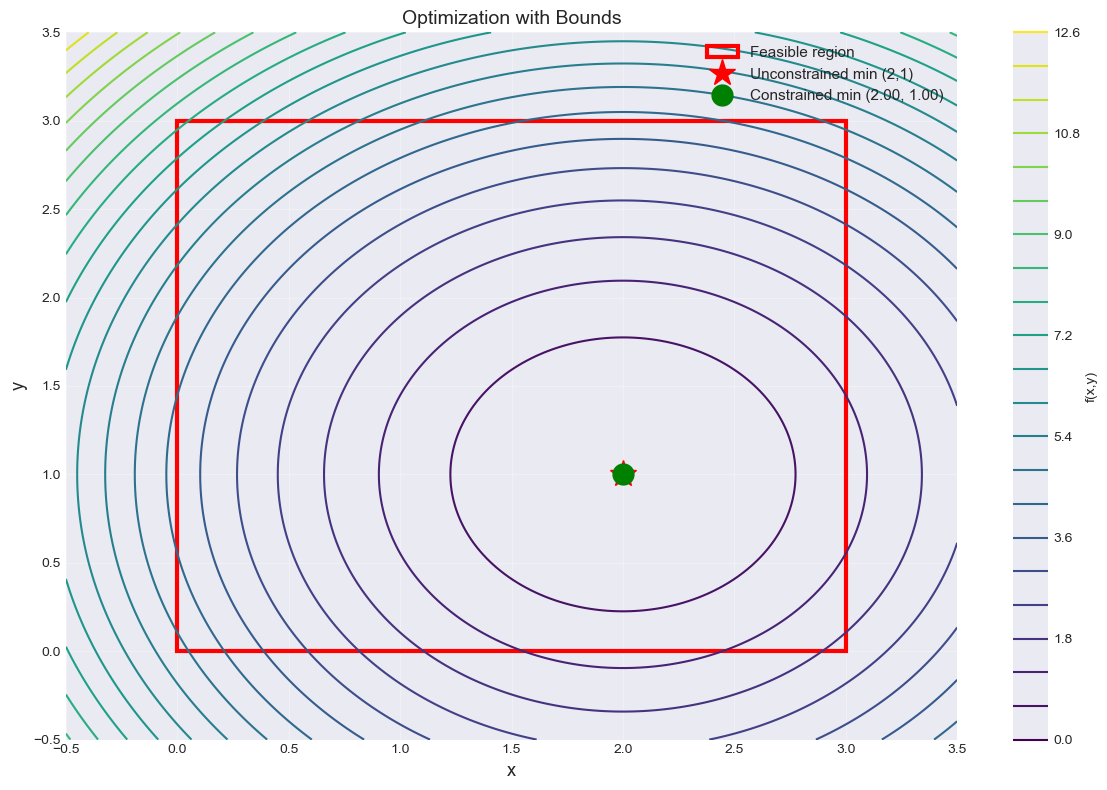

In [2]:
# Objective function
def f(x):
    return (x[0] - 2)**2 + (x[1] - 1)**2

# Initial guess
x0 = np.array([0.5, 0.5])

# Define bounds: 0 ≤ x, y ≤ 3
bounds = optimize.Bounds([0, 0], [3, 3])

# Optimize
result = optimize.minimize(f, x0, bounds=bounds, method='L-BFGS-B')

print("Minimize (x-2)² + (y-1)² with 0 ≤ x,y ≤ 3")
print("\nOptimization result:")
print(f"  Optimal point: x = {result.x}")
print(f"  Minimum value: f = {result.fun:.6f}")
print(f"  Success: {result.success}")
print(f"\nUnconstrained minimum: (2, 1)")
print(f"Constrained minimum: ({result.x[0]:.4f}, {result.x[1]:.4f})")
print(f"\nSince (2,1) is inside bounds, solution is same!")

# Visualize
x = np.linspace(-0.5, 3.5, 200)
y = np.linspace(-0.5, 3.5, 200)
X, Y = np.meshgrid(x, y)
Z = (X - 2)**2 + (Y - 1)**2

plt.figure(figsize=(12, 8))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='f(x,y)')

# Feasible region
rect = Rectangle((0, 0), 3, 3, fill=False, edgecolor='red', linewidth=3,
                 label='Feasible region')
plt.gca().add_patch(rect)

plt.plot(2, 1, 'r*', markersize=20, label='Unconstrained min (2,1)')
plt.plot(result.x[0], result.x[1], 'go', markersize=15,
         label=f'Constrained min ({result.x[0]:.2f}, {result.x[1]:.2f})')
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Optimization with Bounds', fontsize=14)
plt.legend(fontsize=11)
plt.xlim(-0.5, 3.5)
plt.ylim(-0.5, 3.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Linear Inequality Constraints

**Form**: A·x ≤ b

**Example**: x + y ≤ 3 (sum constraint)

**LinearConstraint**:
```python
from scipy.optimize import LinearConstraint
# A·x ≤ b means: -∞ ≤ A·x ≤ b
constraint = LinearConstraint(A, -np.inf, b)
```

**Method**: Use 'trust-constr' or 'SLSQP'

Minimize (x-3)² + (y-2)² subject to:
  x + y ≤ 3
  x, y ≥ 0

Optimization result:
  Optimal point: (2.0000, 1.0000)
  Minimum value: f = 2.0000
  Constraint satisfied: 3.0000 ≤ 3 ✓

Unconstrained minimum (3, 2) violates x+y ≤ 3
Constrained minimum hits the constraint boundary!


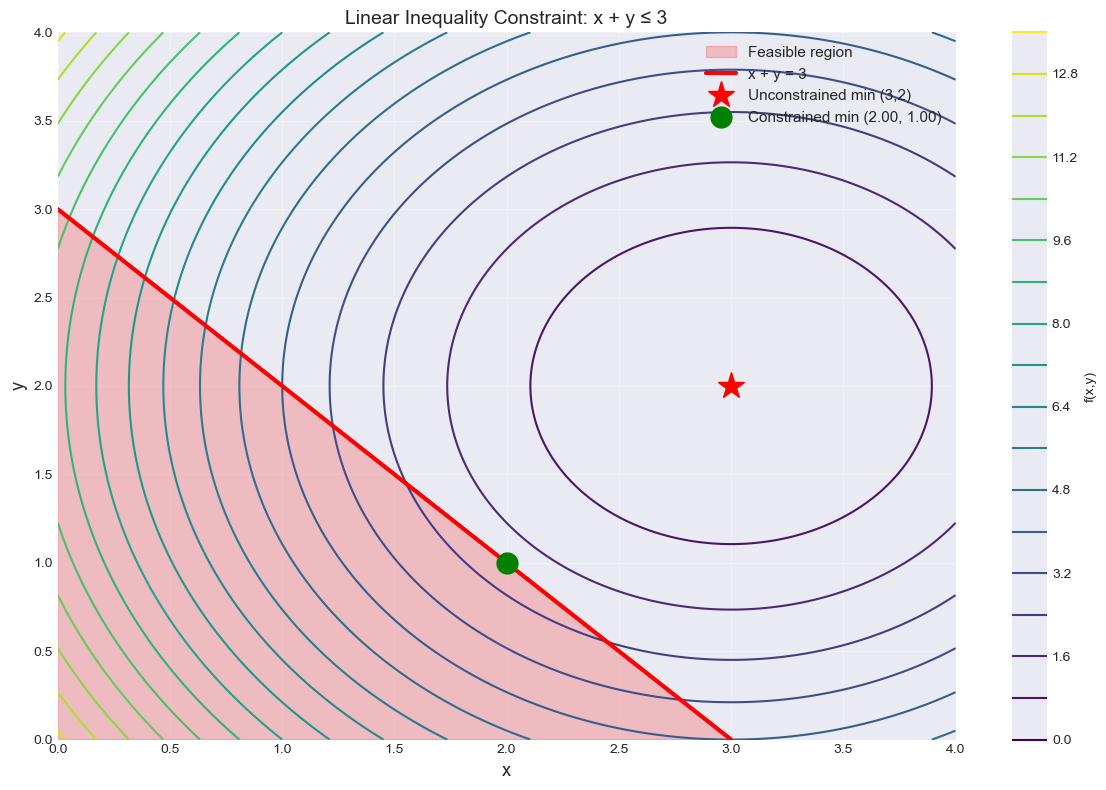


Optimal point lies on constraint boundary!


In [3]:
# Same objective
def f(x):
    return (x[0] - 3)**2 + (x[1] - 2)**2

# Unconstrained minimum at (3, 2)
# Add constraint: x + y ≤ 3

# LinearConstraint: A·x ≤ b
# x + y ≤ 3 means [1, 1]·[x, y] ≤ 3
A = np.array([[1, 1]])
constraint = optimize.LinearConstraint(A, -np.inf, 3)

x0 = np.array([0.0, 0.0])
bounds = optimize.Bounds([0, 0], [np.inf, np.inf])  # x,y ≥ 0

result = optimize.minimize(f, x0, constraints=constraint, 
                          bounds=bounds, method='trust-constr')

print("Minimize (x-3)² + (y-2)² subject to:")
print("  x + y ≤ 3")
print("  x, y ≥ 0\n")

print("Optimization result:")
print(f"  Optimal point: ({result.x[0]:.4f}, {result.x[1]:.4f})")
print(f"  Minimum value: f = {result.fun:.4f}")
print(f"  Constraint satisfied: {result.x[0] + result.x[1]:.4f} ≤ 3 ✓")
print(f"\nUnconstrained minimum (3, 2) violates x+y ≤ 3")
print(f"Constrained minimum hits the constraint boundary!")

# Visualize
x_vals = np.linspace(0, 4, 200)
y_vals = np.linspace(0, 4, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X - 3)**2 + (Y - 2)**2

plt.figure(figsize=(12, 8))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='f(x,y)')

# Feasible region (triangle)
triangle = Polygon([(0, 0), (3, 0), (0, 3)], fill=True, 
                   alpha=0.2, color='red', label='Feasible region')
plt.gca().add_patch(triangle)

# Constraint line x + y = 3
x_line = np.linspace(0, 3, 100)
y_line = 3 - x_line
plt.plot(x_line, y_line, 'r-', linewidth=3, label='x + y = 3')

plt.plot(3, 2, 'r*', markersize=20, label='Unconstrained min (3,2)')
plt.plot(result.x[0], result.x[1], 'go', markersize=15,
         label=f'Constrained min ({result.x[0]:.2f}, {result.x[1]:.2f})')

plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Linear Inequality Constraint: x + y ≤ 3', fontsize=14)
plt.legend(fontsize=11)
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nOptimal point lies on constraint boundary!")

## Equality Constraints

**Form**: h(x) = 0

**Example**: Circle constraint x² + y² = 1

**NonlinearConstraint**:
```python
from scipy.optimize import NonlinearConstraint
# For h(x) = 0:
constraint = NonlinearConstraint(h, 0, 0)
```

**Method**: SLSQP or trust-constr

Find point on unit circle closest to (2, 2)

Minimize: (x-2)² + (y-2)²
Subject to: x² + y² = 1

Optimization result:
  Optimal point: (0.7071, 0.7071)
  Distance squared: 3.3431
  Distance: 1.8284
  Constraint satisfied: x²+y² = 1.0000 ≈ 1 ✓

Analytical solution: (0.7071, 0.7071)
Error: 4.31e-08


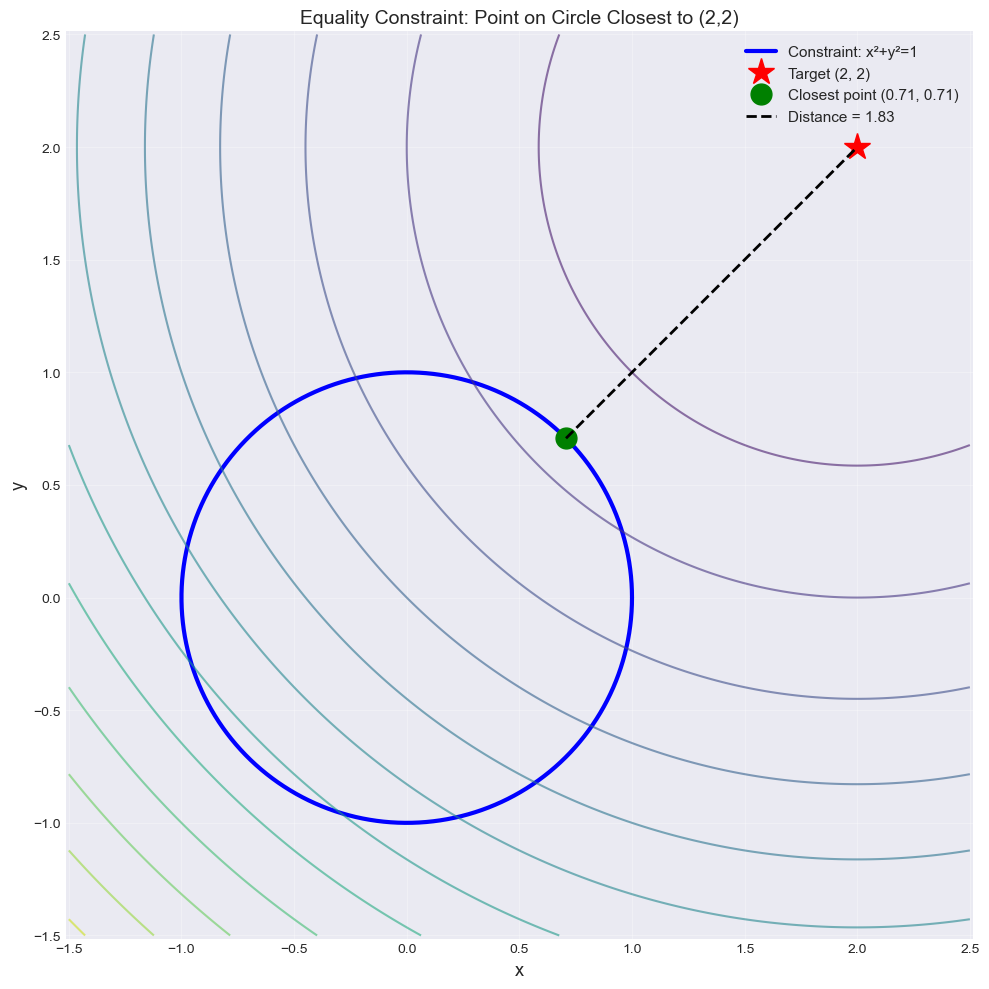


Optimal point lies on circle (constraint satisfied)!


In [4]:
# Minimize distance to point (2, 2) on unit circle
def objective(x):
    return (x[0] - 2)**2 + (x[1] - 2)**2

# Equality constraint: x² + y² = 1 (unit circle)
def circle_constraint(x):
    return x[0]**2 + x[1]**2

# Constraint: x² + y² = 1
constraint = optimize.NonlinearConstraint(circle_constraint, 1, 1)

x0 = np.array([1.0, 0.0])
result = optimize.minimize(objective, x0, constraints=constraint, method='SLSQP')

print("Find point on unit circle closest to (2, 2)")
print("\nMinimize: (x-2)² + (y-2)²")
print("Subject to: x² + y² = 1\n")

print("Optimization result:")
print(f"  Optimal point: ({result.x[0]:.4f}, {result.x[1]:.4f})")
print(f"  Distance squared: {result.fun:.4f}")
print(f"  Distance: {np.sqrt(result.fun):.4f}")
print(f"  Constraint satisfied: x²+y² = {result.x[0]**2 + result.x[1]**2:.4f} ≈ 1 ✓")

# Analytical solution
# Point on circle closest to (2,2) is in direction of (2,2)
direction = np.array([2, 2]) / np.linalg.norm([2, 2])
print(f"\nAnalytical solution: ({direction[0]:.4f}, {direction[1]:.4f})")
print(f"Error: {np.linalg.norm(result.x - direction):.2e}")

# Visualize
plt.figure(figsize=(10, 10))

# Circle x² + y² = 1
theta = np.linspace(0, 2*np.pi, 200)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
plt.plot(x_circle, y_circle, 'b-', linewidth=3, label='Constraint: x²+y²=1')

# Contours of objective
x_vals = np.linspace(-1.5, 2.5, 200)
y_vals = np.linspace(-1.5, 2.5, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X - 2)**2 + (Y - 2)**2
contour = plt.contour(X, Y, Z, levels=15, cmap='viridis', alpha=0.6)

# Points
plt.plot(2, 2, 'r*', markersize=20, label='Target (2, 2)')
plt.plot(result.x[0], result.x[1], 'go', markersize=15,
         label=f'Closest point ({result.x[0]:.2f}, {result.x[1]:.2f})')
plt.plot([result.x[0], 2], [result.x[1], 2], 'k--', linewidth=2, 
         label=f'Distance = {np.sqrt(result.fun):.2f}')

plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Equality Constraint: Point on Circle Closest to (2,2)', fontsize=14)
plt.legend(fontsize=11)
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nOptimal point lies on circle (constraint satisfied)!")

## Real Example: Portfolio Optimization

**Problem**: Allocate wealth across assets to minimize risk

**Variables**: w = [w₁, w₂, w₃] (weights for 3 assets)

**Objective**: Minimize portfolio variance (risk)
\[ \text{Risk} = w^T \Sigma w \]

**Constraints**:
- Budget: w₁ + w₂ + w₃ = 1 (all wealth allocated)
- Non-negative: w_i ≥ 0 (no short selling)
- Minimum return: w^T r ≥ r_target

**Application**: Investment management, pension funds

Portfolio Optimization

Assets:
  Asset 1: Expected return = 10%
  Asset 2: Expected return = 15%
  Asset 3: Expected return = 20%

Target return: 12%
Constraint: sum(weights) = 1, weights ≥ 0

Optimal portfolio:
  Asset 1: 59.38%
  Asset 2: 34.38%
  Asset 3: 6.25%

Portfolio statistics:
  Expected return: 12.34%
  Risk (std dev): 16.86%
  Variance: 0.028438

Constraints check:
  Sum of weights: 1.000000 ≈ 1.0 ✓
  Return: 12.34% ≥ 12% ✓
  All weights ≥ 0: True ✓


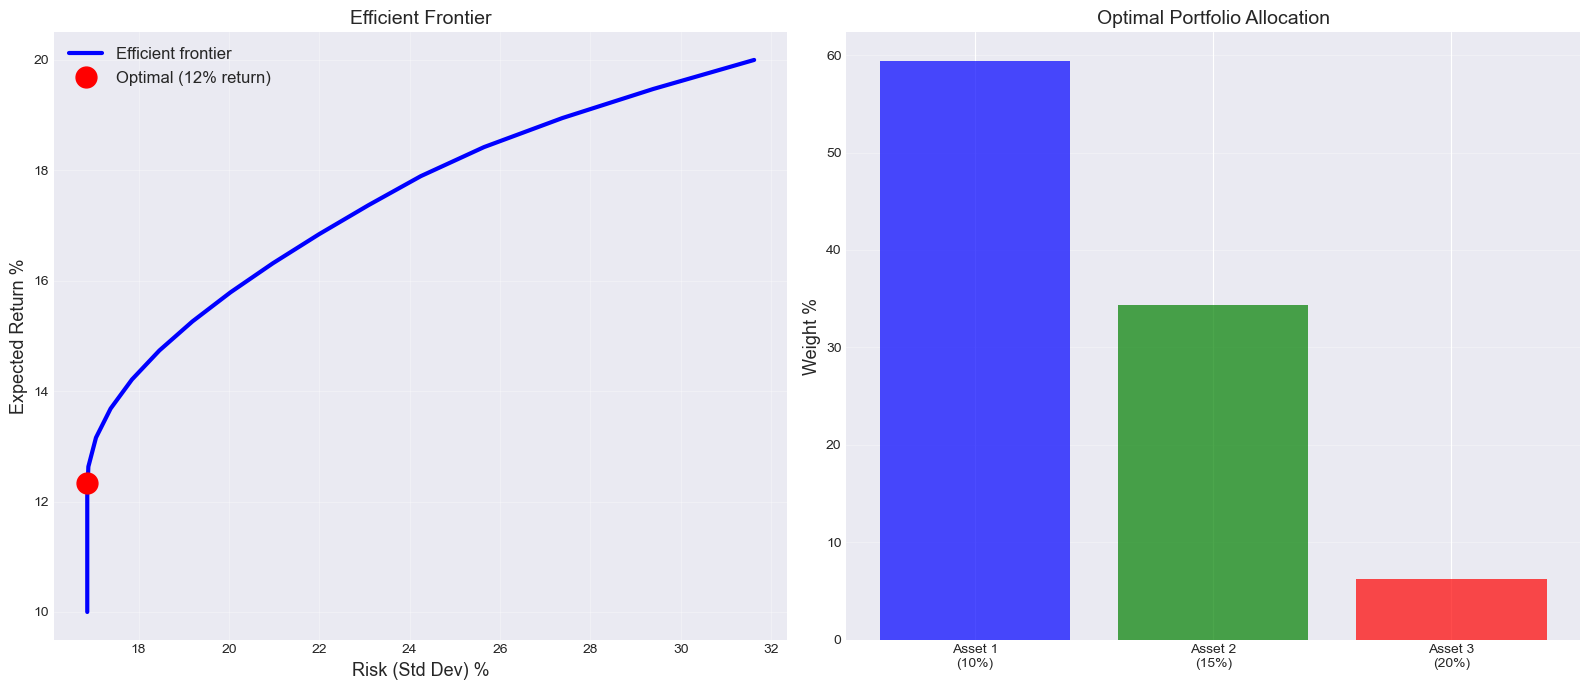


Optimal portfolio balances risk and return!


In [5]:
# Asset parameters
n_assets = 3
expected_returns = np.array([0.10, 0.15, 0.20])  # 10%, 15%, 20%

# Covariance matrix (risk)
cov_matrix = np.array([
    [0.04, 0.01, 0.02],
    [0.01, 0.06, 0.03],
    [0.02, 0.03, 0.10]
])

# Objective: minimize portfolio variance
def portfolio_variance(w):
    return w @ cov_matrix @ w

# Constraints
# 1. Budget: sum(w) = 1
budget_constraint = optimize.LinearConstraint(np.ones(n_assets), 1, 1)

# 2. Minimum return: w·r ≥ 0.12 (12%)
target_return = 0.12
return_constraint = optimize.LinearConstraint(expected_returns, target_return, np.inf)

# 3. Non-negative weights
bounds = optimize.Bounds(np.zeros(n_assets), np.ones(n_assets))

# Initial guess (equal weights)
w0 = np.array([1/3, 1/3, 1/3])

# Optimize
result = optimize.minimize(portfolio_variance, w0, 
                          constraints=[budget_constraint, return_constraint],
                          bounds=bounds, method='SLSQP')

optimal_weights = result.x
optimal_variance = result.fun
optimal_return = optimal_weights @ expected_returns
optimal_std = np.sqrt(optimal_variance)

print("Portfolio Optimization")
print("\nAssets:")
for i in range(n_assets):
    print(f"  Asset {i+1}: Expected return = {expected_returns[i]*100:.0f}%")

print(f"\nTarget return: {target_return*100:.0f}%")
print(f"Constraint: sum(weights) = 1, weights ≥ 0\n")

print("Optimal portfolio:")
for i in range(n_assets):
    print(f"  Asset {i+1}: {optimal_weights[i]*100:.2f}%")

print(f"\nPortfolio statistics:")
print(f"  Expected return: {optimal_return*100:.2f}%")
print(f"  Risk (std dev): {optimal_std*100:.2f}%")
print(f"  Variance: {optimal_variance:.6f}")

# Verify constraints
print(f"\nConstraints check:")
print(f"  Sum of weights: {optimal_weights.sum():.6f} ≈ 1.0 ✓")
print(f"  Return: {optimal_return*100:.2f}% ≥ {target_return*100:.0f}% ✓")
print(f"  All weights ≥ 0: {np.all(optimal_weights >= -1e-6)} ✓")

# Efficient frontier (vary target return)
target_returns = np.linspace(0.10, 0.20, 20)
efficient_risks = []
efficient_weights_list = []

for target in target_returns:
    return_constraint = optimize.LinearConstraint(expected_returns, target, np.inf)
    result = optimize.minimize(portfolio_variance, w0,
                              constraints=[budget_constraint, return_constraint],
                              bounds=bounds, method='SLSQP')
    if result.success:
        efficient_risks.append(np.sqrt(result.fun))
        efficient_weights_list.append(result.x)
    else:
        efficient_risks.append(np.nan)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Efficient frontier
axes[0].plot(np.array(efficient_risks)*100, target_returns*100, 'b-', 
             linewidth=3, label='Efficient frontier')
axes[0].plot(optimal_std*100, optimal_return*100, 'ro', markersize=15,
             label=f'Optimal ({target_return*100:.0f}% return)')
axes[0].set_xlabel('Risk (Std Dev) %', fontsize=13)
axes[0].set_ylabel('Expected Return %', fontsize=13)
axes[0].set_title('Efficient Frontier', fontsize=14)
axes[0].legend(fontsize=12)
axes[0].grid(True, alpha=0.3)

# Weight allocation
asset_names = ['Asset 1\n(10%)', 'Asset 2\n(15%)', 'Asset 3\n(20%)']
axes[1].bar(asset_names, optimal_weights*100, color=['blue', 'green', 'red'], 
            alpha=0.7)
axes[1].set_ylabel('Weight %', fontsize=13)
axes[1].set_title('Optimal Portfolio Allocation', fontsize=14)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nOptimal portfolio balances risk and return!")

## Real Example: Resource Allocation

**Problem**: Maximize profit from production with limited resources

**Products**: Product A and B
- A: Profit = $40, needs 2 hours labor, 1 kg material
- B: Profit = $30, needs 1 hour labor, 2 kg material

**Constraints**:
- Labor: 40 hours available
- Material: 50 kg available
- Non-negative production

**Goal**: Find production quantities (xₐ, x_b) to maximize profit

Production Planning (Resource Allocation)

Products:
  A: $40 profit, 2h labor, 1kg material
  B: $30 profit, 1h labor, 2kg material

Resources:
  Labor: 40 hours
  Material: 50 kg

Optimal production:
  Product A: 10.00 units
  Product B: 20.00 units
  Total profit: $1000.00

Resource usage:
  Labor: 40.00 / 40 hours (100.0%)
  Material: 50.00 / 50 kg (100.0%)


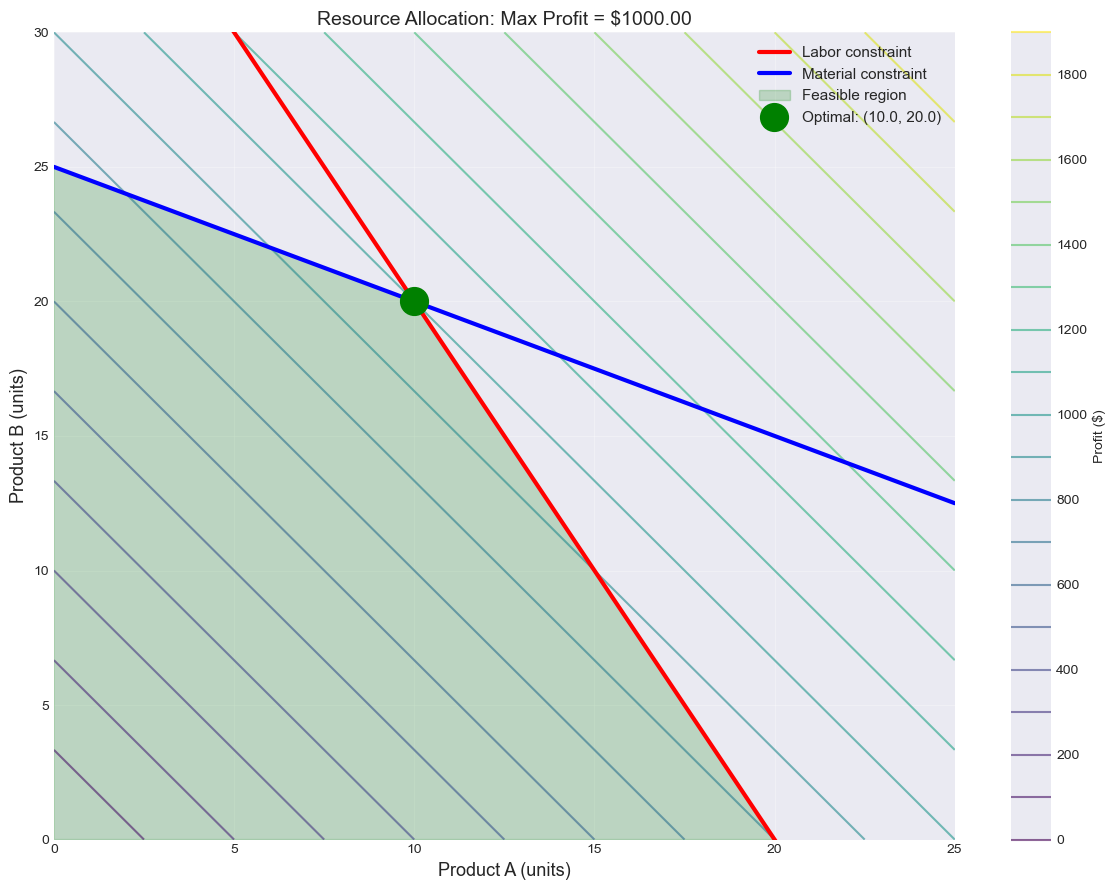


Optimal solution at corner of feasible region!


In [6]:
# Profit function (negative for minimization)
def neg_profit(x):
    x_A, x_B = x
    return -(40*x_A + 30*x_B)  # Negative because we minimize

# Constraints
# Labor: 2*x_A + 1*x_B ≤ 40
# Material: 1*x_A + 2*x_B ≤ 50

# Resource constraint matrix
A_resources = np.array([
    [2, 1],  # Labor constraint
    [1, 2]   # Material constraint
])
resource_limits = np.array([40, 50])

resource_constraint = optimize.LinearConstraint(A_resources, -np.inf, resource_limits)
bounds = optimize.Bounds([0, 0], [np.inf, np.inf])

x0 = np.array([10.0, 10.0])
result = optimize.minimize(neg_profit, x0, constraints=resource_constraint,
                          bounds=bounds, method='SLSQP')

x_A_opt, x_B_opt = result.x
max_profit = -result.fun
labor_used = 2*x_A_opt + x_B_opt
material_used = x_A_opt + 2*x_B_opt

print("Production Planning (Resource Allocation)")
print("\nProducts:")
print("  A: $40 profit, 2h labor, 1kg material")
print("  B: $30 profit, 1h labor, 2kg material")
print("\nResources:")
print("  Labor: 40 hours")
print("  Material: 50 kg\n")

print("Optimal production:")
print(f"  Product A: {x_A_opt:.2f} units")
print(f"  Product B: {x_B_opt:.2f} units")
print(f"  Total profit: ${max_profit:.2f}")

print(f"\nResource usage:")
print(f"  Labor: {labor_used:.2f} / 40 hours ({labor_used/40*100:.1f}%)")
print(f"  Material: {material_used:.2f} / 50 kg ({material_used/50*100:.1f}%)")

# Visualize feasible region
x_A_vals = np.linspace(0, 25, 300)
x_B_vals = np.linspace(0, 30, 300)
X_A, X_B = np.meshgrid(x_A_vals, x_B_vals)

# Profit contours
Profit = 40*X_A + 30*X_B

plt.figure(figsize=(12, 9))
contour = plt.contour(X_A, X_B, Profit, levels=20, cmap='viridis', alpha=0.6)
plt.colorbar(contour, label='Profit ($)')

# Constraint lines
x_A_line = np.linspace(0, 25, 100)
# Labor: 2x_A + x_B ≤ 40
x_B_labor = 40 - 2*x_A_line
# Material: x_A + 2x_B ≤ 50
x_B_material = (50 - x_A_line) / 2

plt.plot(x_A_line, x_B_labor, 'r-', linewidth=3, label='Labor constraint')
plt.plot(x_A_line, x_B_material, 'b-', linewidth=3, label='Material constraint')

# Feasible region
feasible_x = [0, 0, 10, 20, 0]
feasible_y = [0, 25, 20, 0, 0]
plt.fill(feasible_x, feasible_y, alpha=0.2, color='green', label='Feasible region')

# Optimal point
plt.plot(x_A_opt, x_B_opt, 'go', markersize=20,
         label=f'Optimal: ({x_A_opt:.1f}, {x_B_opt:.1f})')

plt.xlabel('Product A (units)', fontsize=13)
plt.ylabel('Product B (units)', fontsize=13)
plt.title(f'Resource Allocation: Max Profit = ${max_profit:.2f}', fontsize=14)
plt.legend(fontsize=11)
plt.xlim(0, 25)
plt.ylim(0, 30)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nOptimal solution at corner of feasible region!")

## Summary

### Constraint Types:

```python
from scipy.optimize import Bounds, LinearConstraint, NonlinearConstraint

# 1. Bounds: a ≤ x ≤ b
bounds = Bounds(lb, ub)

# 2. Linear: A·x ≤ b (or = b)
linear_con = LinearConstraint(A, lb, ub)

# 3. Nonlinear: c(x) = 0 or c(x) ≤ 0
nonlinear_con = NonlinearConstraint(func, lb, ub)
```

### Methods:

| Method | Equality | Inequality | Bounds | Speed |
|--------|----------|------------|--------|-------|
| **SLSQP** | ✓ | ✓ | ✓ | Fast |
| **trust-constr** | ✓ | ✓ | ✓ | Medium |
| **COBYLA** | No | ✓ | ✓ | Slow |
| **L-BFGS-B** | No | No | ✓ | V. Fast |

**Recommendation**: SLSQP for most constrained problems

### Best Practices:

✓ **Scale variables** to similar magnitude  
✓ **Feasible initial guess** helps convergence  
✓ **Provide gradients** when possible  
✓ **Check constraint satisfaction** in result  
✓ **Multiple starting points** for non-convex problems  

### Applications:

- **Finance**: Portfolio optimization, risk management
- **Operations Research**: Production planning, scheduling
- **Engineering**: Design optimization, parameter tuning
- **Machine Learning**: Constrained parameter estimation
- **Economics**: Resource allocation, equilibrium problems

### Common Issues:

⚠️ **Infeasible problem**: No solution satisfies all constraints  
⚠️ **Poor initial guess**: May fail to converge  
⚠️ **Nonlinear constraints**: Harder to satisfy exactly  
⚠️ **Local minima**: May not find global optimum  

### Next:

- **Global optimization**: Find global minimum
- **Mixed-integer**: Discrete and continuous variables
- **Quadratic programming**: Specialized solvers